# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Viewing Dataset

In [2]:
df = pd.read_csv('Ames_Housing_Data.csv')
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [4]:
df.isna().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [5]:
df.isna().sum().sum()

13997

In [6]:
df.shape

(2930, 81)

In [7]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [8]:
df['Sale Type'].value_counts()

WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: Sale Type, dtype: int64

In [9]:
df['Sale Condition'].value_counts()

Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03
BsmtFin SF 1,2929.0,4.426296e+02,4.555908e+02,0.0,0.000000e+00,370.0,7.340000e+02,5.644000e+03


# Getting a Copy

In [11]:
df_copy = df.copy()

# Feature Engineering

In [12]:
def nanDeleter(df,percentage) :
    for col in df.columns : 
        if df[col].isna().sum() > df[col].count() * percentage//100 :
            print(f'{col} column has deleted because {df[col].isna().sum()} nan values')
            df.drop(col , axis = 1 , inplace = True)

In [13]:
nanDeleter(df,80)

Alley column has deleted because 2732 nan values
Fireplace Qu column has deleted because 1422 nan values
Pool QC column has deleted because 2917 nan values
Fence column has deleted because 2358 nan values
Misc Feature column has deleted because 2824 nan values


In [14]:
df.shape

(2930, 76)

In [15]:
def nanShower(df,percentage) :
    for col in df.columns : 
        if df[col].isna().sum() > df[col].count() * percentage//100 :
            print(f'{col} column has {df[col].isna().sum()} nan values')

In [16]:
nanShower(df , 1)

Lot Frontage column has 490 nan values
Bsmt Qual column has 80 nan values
Bsmt Cond column has 80 nan values
Bsmt Exposure column has 83 nan values
BsmtFin Type 1 column has 80 nan values
BsmtFin Type 2 column has 81 nan values
Garage Type column has 157 nan values
Garage Yr Blt column has 159 nan values
Garage Finish column has 159 nan values
Garage Qual column has 159 nan values
Garage Cond column has 159 nan values


In [17]:
df['Garage Finish'].value_counts() # Garage Finish is suspicious column.

Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64

In [18]:
def n_class(df):
    for col in df.columns:
        if len(df[col].value_counts()) == 1 :
            print(f"{col} column has only 1 class")
            print(df[col].value_counts(), end = '\n\n\n')
        elif len(df[col].value_counts()) == 2 :
            print(f"{col} column has only 2 class")
            print(df[col].value_counts(), end = '\n\n\n')
        elif len(df[col].value_counts()) == 3 :
            print(f"{col} column has only 3 class")
            print(df[col].value_counts(), end = '\n\n\n')

In [19]:
n_class(df)

Street column has only 2 class
Pave    2918
Grvl      12
Name: Street, dtype: int64


Utilities column has only 3 class
AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64


Land Slope column has only 3 class
Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64


Central Air column has only 2 class
Y    2734
N     196
Name: Central Air, dtype: int64


Bsmt Half Bath column has only 3 class
0.0    2753
1.0     171
2.0       4
Name: Bsmt Half Bath, dtype: int64


Half Bath column has only 3 class
0    1843
1    1062
2      25
Name: Half Bath, dtype: int64


Garage Finish column has only 3 class
Unf    1231
RFn     812
Fin     728
Name: Garage Finish, dtype: int64


Paved Drive column has only 3 class
Y    2652
N     216
P      62
Name: Paved Drive, dtype: int64




In [20]:
dropping = ['Street' , 'Utilities' , 'Land Slope' , 'Central Air' , 'Bsmt Half Bath' , 'Paved Drive']

In [21]:
df.drop(dropping, axis = 1 , inplace=True)

In [22]:
df.shape

(2930, 70)

In [23]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,NAmes,Norm,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Reg,Lvl,Corner,NAmes,Norm,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [24]:
df.select_dtypes('object')

,MS Zoning,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,...,Heating QC,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Sale Type,Sale Condition
0,RL,IR1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,Fa,SBrkr,TA,Typ,Attchd,Fin,TA,TA,WD,Normal
1,RH,Reg,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,...,TA,SBrkr,TA,Typ,Attchd,Unf,TA,TA,WD,Normal
2,RL,IR1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,TA,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,WD,Normal
3,RL,Reg,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,Ex,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,WD,Normal
4,RL,IR1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,Gd,SBrkr,TA,Typ,Attchd,Fin,TA,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,IR1,Lvl,CulDSac,Mitchel,Norm,Norm,1Fam,SLvl,Gable,...,TA,SBrkr,TA,Typ,Detchd,Unf,TA,TA,WD,Normal
2926,RL,IR1,Low,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,...,TA,SBrkr,TA,Typ,Attchd,Unf,TA,TA,WD,Normal
2927,RL,Reg,Lvl,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,...,TA,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,WD,Normal
2928,RL,Reg,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,...,Gd,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal


In [25]:
hardClass_cols = []

def hardClass(df,percentage) :
    for col in df.columns : 
        for n_class in df[col].value_counts():
            if n_class > df[col].count() * percentage // 100:
                print(f'{col} column has a hard class. {n_class} in one class')
                hardClass_cols.append(col)

In [26]:
hardClass(df,90)

Condition 2 column has a hard class. 2900 in one class
Roof Matl column has a hard class. 2887 in one class
Bsmt Cond column has a hard class. 2616 in one class
Heating column has a hard class. 2885 in one class
Electrical column has a hard class. 2682 in one class
Low Qual Fin SF column has a hard class. 2890 in one class
Kitchen AbvGr column has a hard class. 2796 in one class
Functional column has a hard class. 2728 in one class
Garage Qual column has a hard class. 2615 in one class
Garage Cond column has a hard class. 2665 in one class
3Ssn Porch column has a hard class. 2893 in one class
Screen Porch column has a hard class. 2674 in one class
Pool Area column has a hard class. 2917 in one class
Misc Val column has a hard class. 2827 in one class


In [27]:
# dropping2 = ['Land Contour' , 'Condition 1' , 'Condition 2' , 'Bldg Type' , 'Roof Matl' , 'Exter Cond' , 'Bsmt Cond' , 'BsmtFin Type 2' , 'BsmtFin SF 2' , 'Heating' ,
#              'Electrical' , 'Low Qual Fin SF' , 'Kitchen AbvGr' , 'Functional' , 'Garage Qual' ,'Garage Cond' ,'Enclosed Porch' ,'3Ssn Porch' , 'Screen Porch',
#              'Pool Area' ,'Misc Val' , 'Sale Type' ,'Sale Condition']

In [28]:
hardClass_cols.remove('Garage Qual')

In [29]:
df.drop(hardClass_cols , axis = 1)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,...,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Enclosed Porch,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,NAmes,Norm,...,528.0,TA,210,62,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,...,730.0,TA,140,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,...,312.0,TA,393,36,0,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Reg,Lvl,Corner,NAmes,Norm,...,522.0,TA,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,...,482.0,TA,212,34,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,IR1,Lvl,CulDSac,Mitchel,Norm,...,588.0,TA,120,0,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,IR1,Low,Inside,Mitchel,Norm,...,484.0,TA,164,0,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Reg,Lvl,Inside,Mitchel,Norm,...,0.0,NaN,80,32,0,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Reg,Lvl,Inside,Mitchel,Norm,...,418.0,TA,240,38,0,4,2006,WD,Normal,170000


In [30]:
df.shape

(2930, 70)

In [31]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,NAmes,Norm,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Reg,Lvl,Corner,NAmes,Norm,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [32]:
def continousFeatures(df,num):
    for col in df.columns : 
        if len(df[col].value_counts()) > num : 
            print(f'{col} column continous feature. Because has {df[col].nunique()} different value.')

In [33]:
continousFeatures(df,15)

PID column continous feature. Because has 2930 different value.
MS SubClass column continous feature. Because has 16 different value.
Lot Frontage column continous feature. Because has 128 different value.
Lot Area column continous feature. Because has 1960 different value.
Neighborhood column continous feature. Because has 28 different value.
Year Built column continous feature. Because has 118 different value.
Year Remod/Add column continous feature. Because has 61 different value.
Exterior 1st column continous feature. Because has 16 different value.
Exterior 2nd column continous feature. Because has 17 different value.
Mas Vnr Area column continous feature. Because has 445 different value.
BsmtFin SF 1 column continous feature. Because has 995 different value.
BsmtFin SF 2 column continous feature. Because has 274 different value.
Bsmt Unf SF column continous feature. Because has 1137 different value.
Total Bsmt SF column continous feature. Because has 1058 different value.
1st Flr

In [34]:
df.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Type', 'Garage Yr Blt', 'Garage Finish',
       'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Wood Deck SF', 'Open Porc

In [35]:
df.isna().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 70, dtype: int64

In [36]:
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(),inplace = True)
df['Mas Vnr Type'].fillna(df['Mas Vnr Type'].mode()[0],inplace = True)
df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].mode()[0],inplace = True)
df.drop('BsmtFin SF 1' , axis = 1 , inplace = True)
df.drop('Bsmt Unf SF' , axis = 1 , inplace = True)
df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].mode()[0],inplace = True)
df['Bsmt Full Bath'].fillna(df['Bsmt Full Bath'].mode()[0],inplace = True)
df['Garage Type'].fillna(df['Garage Type'].mode()[0],inplace = True)
df.drop('Garage Yr Blt' , axis = 1 , inplace = True) 
df.drop('Garage Finish' , axis = 1 , inplace = True) 
df.drop('Garage Cars' , axis = 1 , inplace = True) 
df['Garage Area'].fillna(df['Garage Area'].mode()[0],inplace = True)

In [37]:
df.shape

(2930, 65)

In [38]:
df.isna().sum()

PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 65, dtype: int64

In [39]:
df.dropna(inplace = True) # So suspicious

In [40]:
df.shape

(2700, 65)

In [41]:
df.isna().sum()

PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 65, dtype: int64

In [42]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,NAmes,Norm,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Reg,Lvl,Corner,NAmes,Norm,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [43]:
df.select_dtypes('object')

,MS Zoning,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,...,Heating,Heating QC,Electrical,Kitchen Qual,Functional,Garage Type,Garage Qual,Garage Cond,Sale Type,Sale Condition
0,RL,IR1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,GasA,Fa,SBrkr,TA,Typ,Attchd,TA,TA,WD,Normal
1,RH,Reg,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,...,GasA,TA,SBrkr,TA,Typ,Attchd,TA,TA,WD,Normal
2,RL,IR1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,GasA,TA,SBrkr,Gd,Typ,Attchd,TA,TA,WD,Normal
3,RL,Reg,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,GasA,Ex,SBrkr,Ex,Typ,Attchd,TA,TA,WD,Normal
4,RL,IR1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,GasA,Gd,SBrkr,TA,Typ,Attchd,TA,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,RL,Reg,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,...,GasA,Ex,SBrkr,TA,Typ,Detchd,TA,TA,WD,Abnorml
2925,RL,IR1,Lvl,CulDSac,Mitchel,Norm,Norm,1Fam,SLvl,Gable,...,GasA,TA,SBrkr,TA,Typ,Detchd,TA,TA,WD,Normal
2926,RL,IR1,Low,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,...,GasA,TA,SBrkr,TA,Typ,Attchd,TA,TA,WD,Normal
2928,RL,Reg,Lvl,Inside,Mitchel,Norm,Norm,1Fam,1Story,Gable,...,GasA,Gd,SBrkr,TA,Typ,Attchd,TA,TA,WD,Normal


In [44]:
classNumber_Many = []

def classNumber(df , num) :
    for cat_col in df.select_dtypes('object').columns : 
        if df[cat_col].value_counts().nunique() > num : 
            print(f'{cat_col} categoric feature has {df[cat_col].value_counts().nunique()} different class.')
            classNumber_Many.append(cat_col)

In [45]:
classNumber(df , 10) # 27 - 13 - 14 not too many.

Neighborhood categoric feature has 26 different class.
Exterior 1st categoric feature has 13 different class.
Exterior 2nd categoric feature has 15 different class.


In [46]:
def outlier_deleter(df,target_col , whisker):
  for col in df.drop(target_col , axis = 1).columns : 
    if df[col].dtype != 'object':
      q3 =  np.percentile(df[col] , 75)
      q1 =  np.percentile(df[col] , 25)

      iqr = q3 - q1
      low_lim = q1 - (whisker*iqr)
      high_lim = q3 + (whisker*iqr)

      outlier_indexes = df[ (df[col] > high_lim) | (df[col] < low_lim) ].index
      df.drop(outlier_indexes , axis = 0 , inplace = True)
      print(f'Total outlier {len(outlier_indexes)} in {col} column and dropped.')

In [47]:
def outlier_teller(df,target_col , whisker):
  for col in df.drop(target_col , axis = 1).columns : 
    if df[col].dtype != 'object':
      q3 =  np.percentile(df[col] , 75)
      q1 =  np.percentile(df[col] , 25)

      iqr = q3 - q1
      low_lim = q1 - (whisker*iqr)
      high_lim = q3 + (whisker*iqr)

      outlier_indexes = df[ (df[col] > high_lim) | (df[col] < low_lim) ].index
      print(f'Total outlier {len(outlier_indexes)} in {col} column')

In [48]:
outlier_teller(df,'SalePrice',3) 

Total outlier 0 in PID column
Total outlier 0 in MS SubClass column
Total outlier 21 in Lot Frontage column
Total outlier 48 in Lot Area column
Total outlier 0 in Overall Qual column
Total outlier 3 in Overall Cond column
Total outlier 0 in Year Built column
Total outlier 0 in Year Remod/Add column
Total outlier 45 in Mas Vnr Area column
Total outlier 344 in BsmtFin SF 2 column
Total outlier 5 in Total Bsmt SF column
Total outlier 4 in 1st Flr SF column
Total outlier 0 in 2nd Flr SF column
Total outlier 29 in Low Qual Fin SF column
Total outlier 8 in Gr Liv Area column
Total outlier 0 in Bsmt Full Bath column
Total outlier 0 in Full Bath column
Total outlier 0 in Half Bath column
Total outlier 0 in Bedroom AbvGr column
Total outlier 77 in Kitchen AbvGr column
Total outlier 1 in TotRms AbvGrd column
Total outlier 0 in Fireplaces column
Total outlier 7 in Garage Area column
Total outlier 6 in Wood Deck SF column
Total outlier 23 in Open Porch SF column
Total outlier 399 in Enclosed Porch

In [49]:
outlier_deleter(df,'SalePrice',3)

Total outlier 0 in PID column and dropped.
Total outlier 0 in MS SubClass column and dropped.
Total outlier 21 in Lot Frontage column and dropped.
Total outlier 42 in Lot Area column and dropped.
Total outlier 0 in Overall Qual column and dropped.
Total outlier 2 in Overall Cond column and dropped.
Total outlier 0 in Year Built column and dropped.
Total outlier 0 in Year Remod/Add column and dropped.
Total outlier 37 in Mas Vnr Area column and dropped.
Total outlier 331 in BsmtFin SF 2 column and dropped.
Total outlier 1 in Total Bsmt SF column and dropped.
Total outlier 0 in 1st Flr SF column and dropped.
Total outlier 0 in 2nd Flr SF column and dropped.
Total outlier 26 in Low Qual Fin SF column and dropped.
Total outlier 2 in Gr Liv Area column and dropped.
Total outlier 0 in Bsmt Full Bath column and dropped.
Total outlier 0 in Full Bath column and dropped.
Total outlier 0 in Half Bath column and dropped.
Total outlier 0 in Bedroom AbvGr column and dropped.
Total outlier 68 in Kitc

In [50]:
df.shape

(1598, 65)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 3 to 2929
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              1598 non-null   int64  
 1   MS SubClass      1598 non-null   int64  
 2   MS Zoning        1598 non-null   object 
 3   Lot Frontage     1598 non-null   float64
 4   Lot Area         1598 non-null   int64  
 5   Lot Shape        1598 non-null   object 
 6   Land Contour     1598 non-null   object 
 7   Lot Config       1598 non-null   object 
 8   Neighborhood     1598 non-null   object 
 9   Condition 1      1598 non-null   object 
 10  Condition 2      1598 non-null   object 
 11  Bldg Type        1598 non-null   object 
 12  House Style      1598 non-null   object 
 13  Overall Qual     1598 non-null   int64  
 14  Overall Cond     1598 non-null   int64  
 15  Year Built       1598 non-null   int64  
 16  Year Remod/Add   1598 non-null   int64  
 17  Roof Style    

In [52]:
df['Sale Type'].value_counts()

WD       1341
New       195
COD        34
ConLD       9
CWD         7
ConLI       4
Con         3
ConLw       3
Oth         2
Name: Sale Type, dtype: int64

In [53]:
df.drop('PID' , axis = 1 , inplace = True)

In [54]:
df.shape

(1598, 64)

In [55]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Type', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
   

In [56]:
df.corr()['SalePrice'].drop('SalePrice')

MS SubClass       -0.123400
Lot Frontage       0.427784
Lot Area           0.420463
Overall Qual       0.817291
Overall Cond      -0.228464
Year Built         0.578658
Year Remod/Add     0.556659
Mas Vnr Area       0.438319
BsmtFin SF 2            NaN
Total Bsmt SF      0.673724
1st Flr SF         0.658683
2nd Flr SF         0.247285
Low Qual Fin SF         NaN
Gr Liv Area        0.765661
Bsmt Full Bath     0.255293
Full Bath          0.599299
Half Bath          0.209015
Bedroom AbvGr      0.191768
Kitchen AbvGr           NaN
TotRms AbvGrd      0.606657
Fireplaces         0.455105
Garage Area        0.699307
Wood Deck SF       0.342368
Open Porch SF      0.371166
Enclosed Porch          NaN
3Ssn Porch              NaN
Screen Porch            NaN
Pool Area               NaN
Misc Val                NaN
Mo Sold            0.055263
Yr Sold           -0.010671
Name: SalePrice, dtype: float64

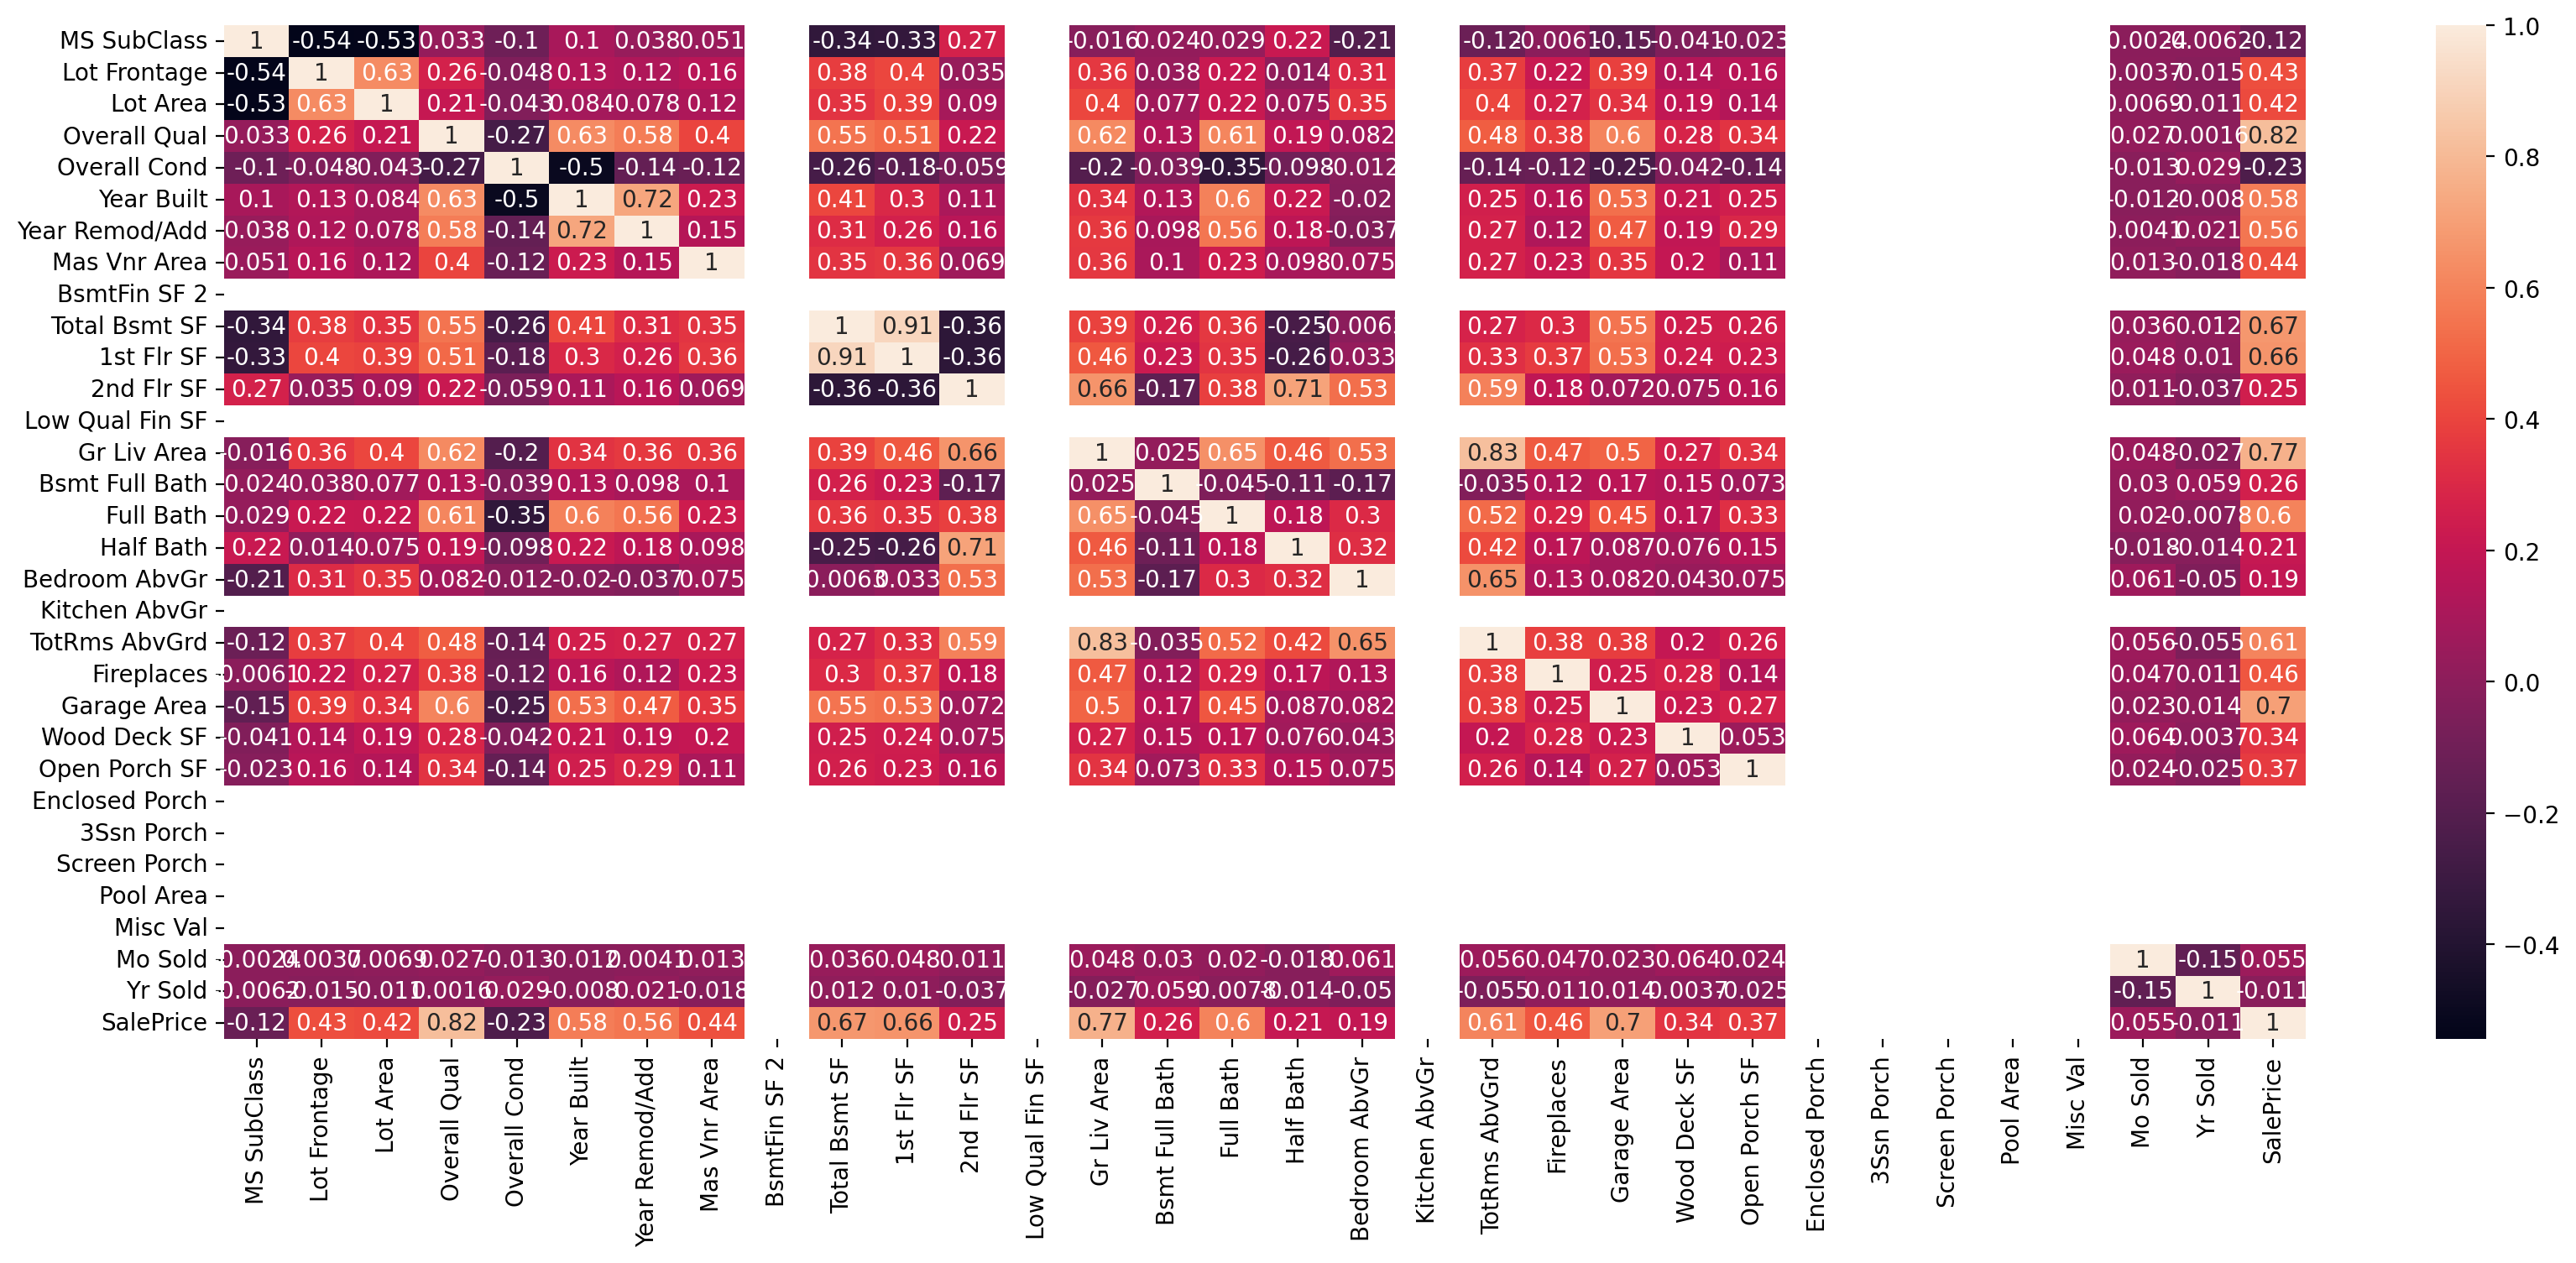

In [57]:
plt.figure(figsize=(20,8) , dpi = 200)

sns.heatmap(df.corr() , annot = True );

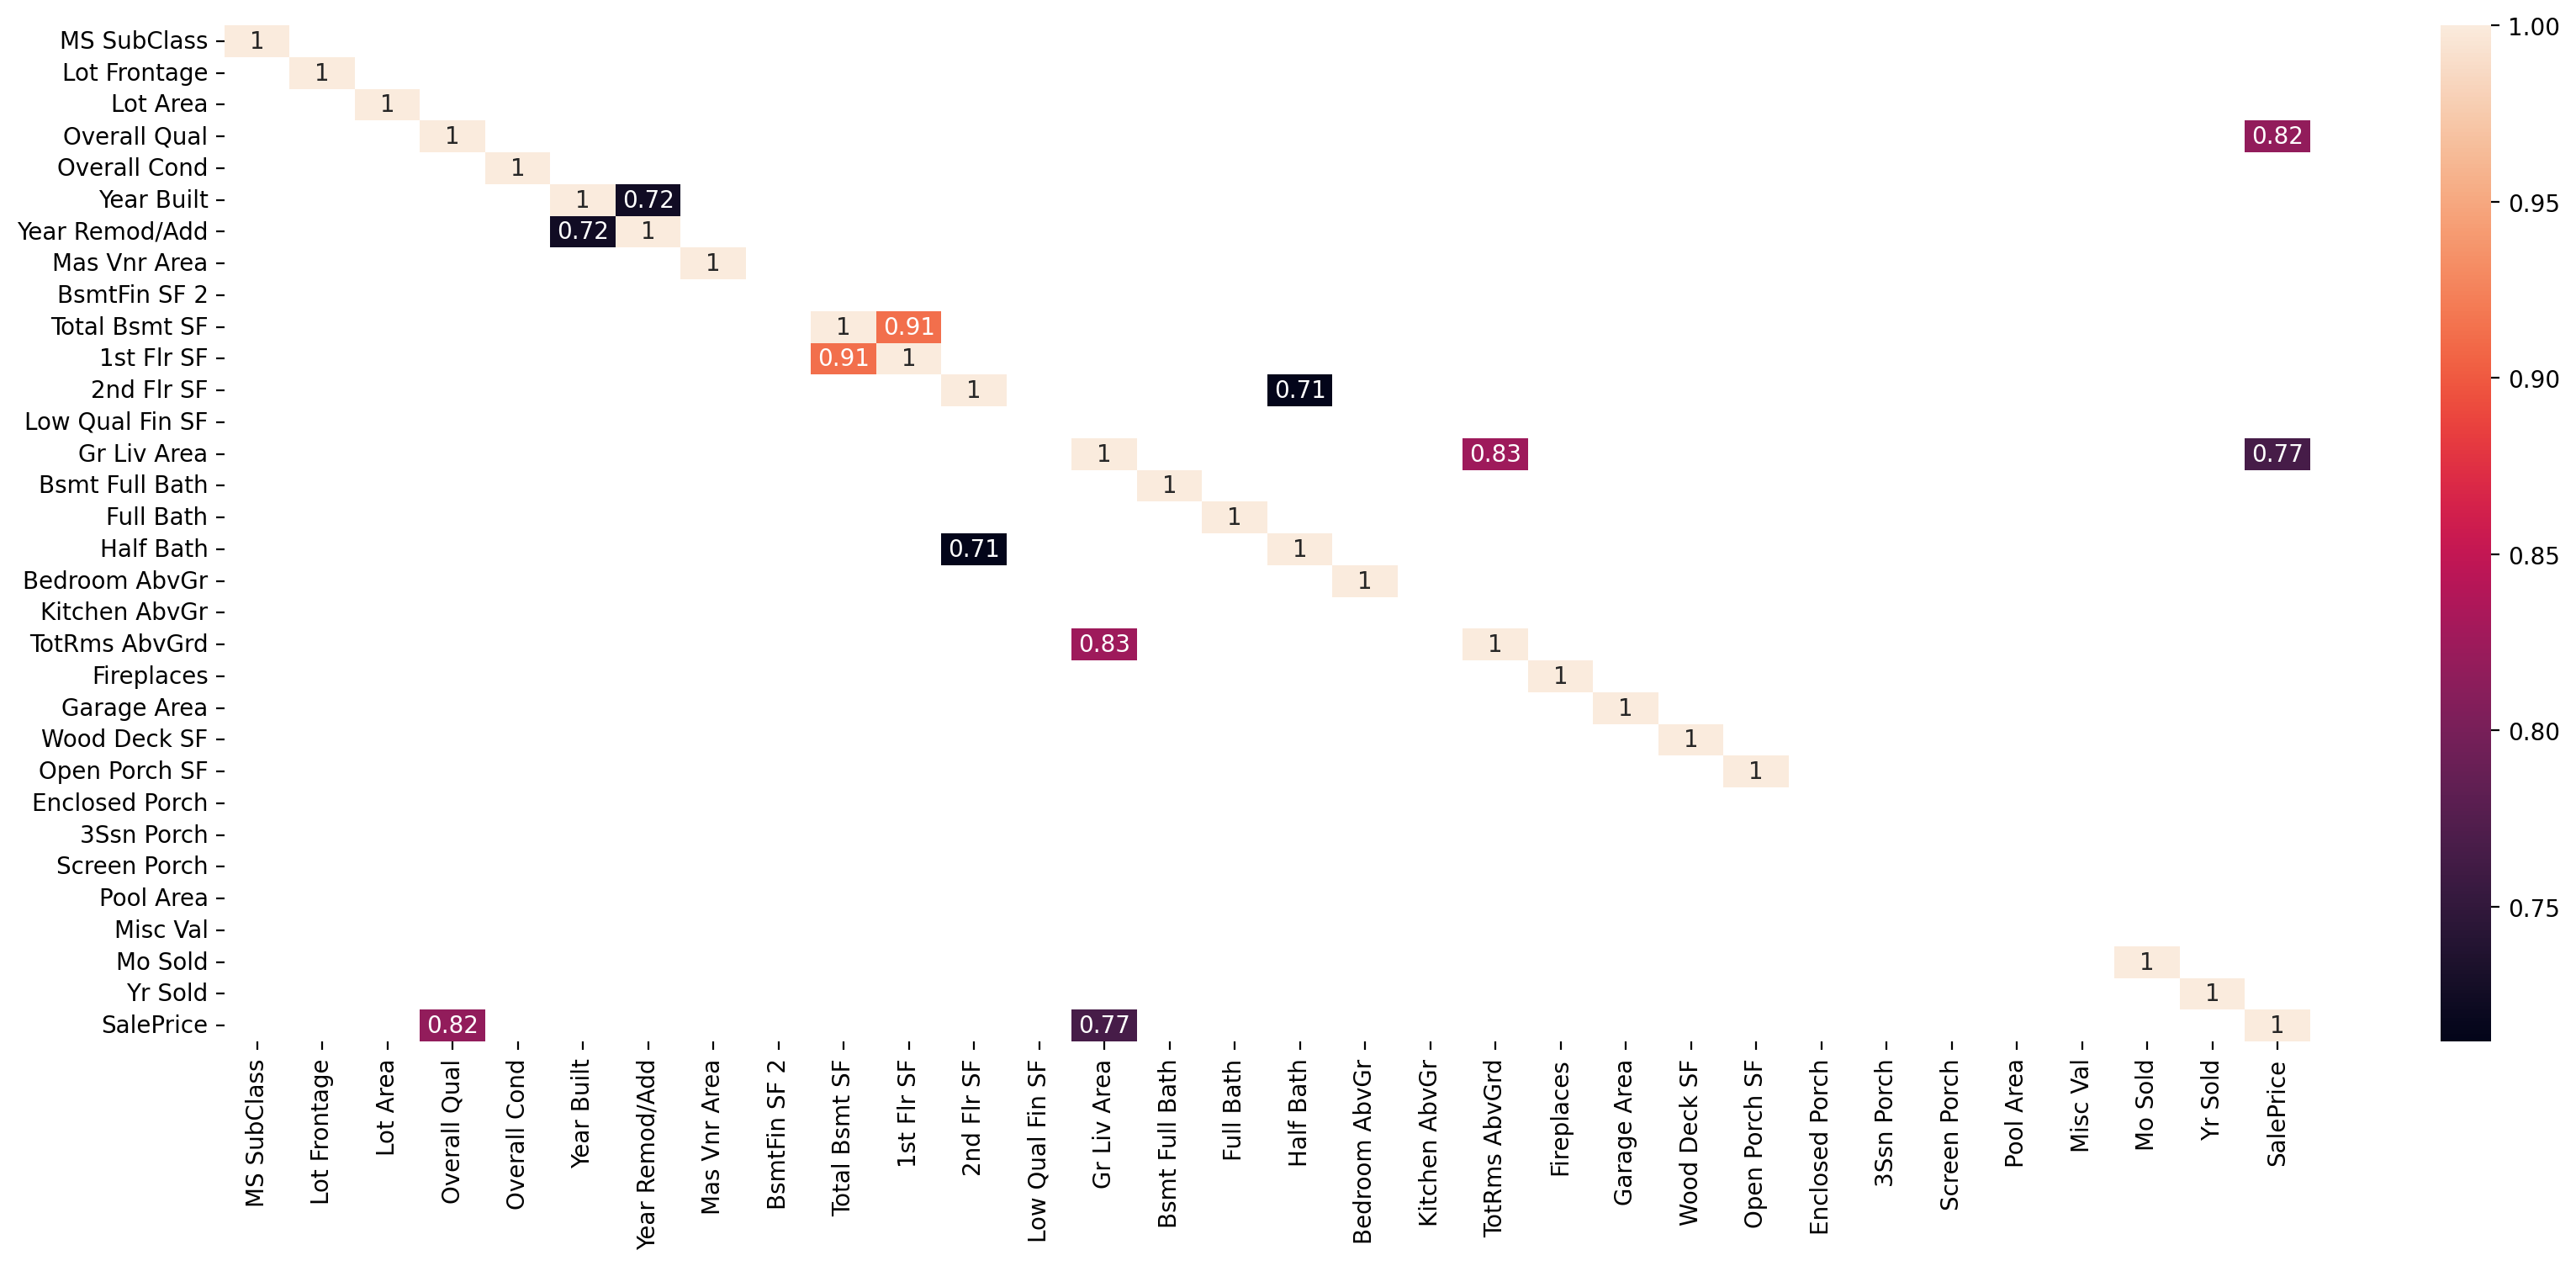

In [58]:
plt.figure(figsize=(20,8) , dpi = 200)

sns.heatmap(df.corr()[df.corr() > 0.7] , annot = True );

In [59]:
df.drop(['1st Flr SF' , '2nd Flr SF' , 'Bedroom AbvGr'] , axis = 1 , inplace = True)

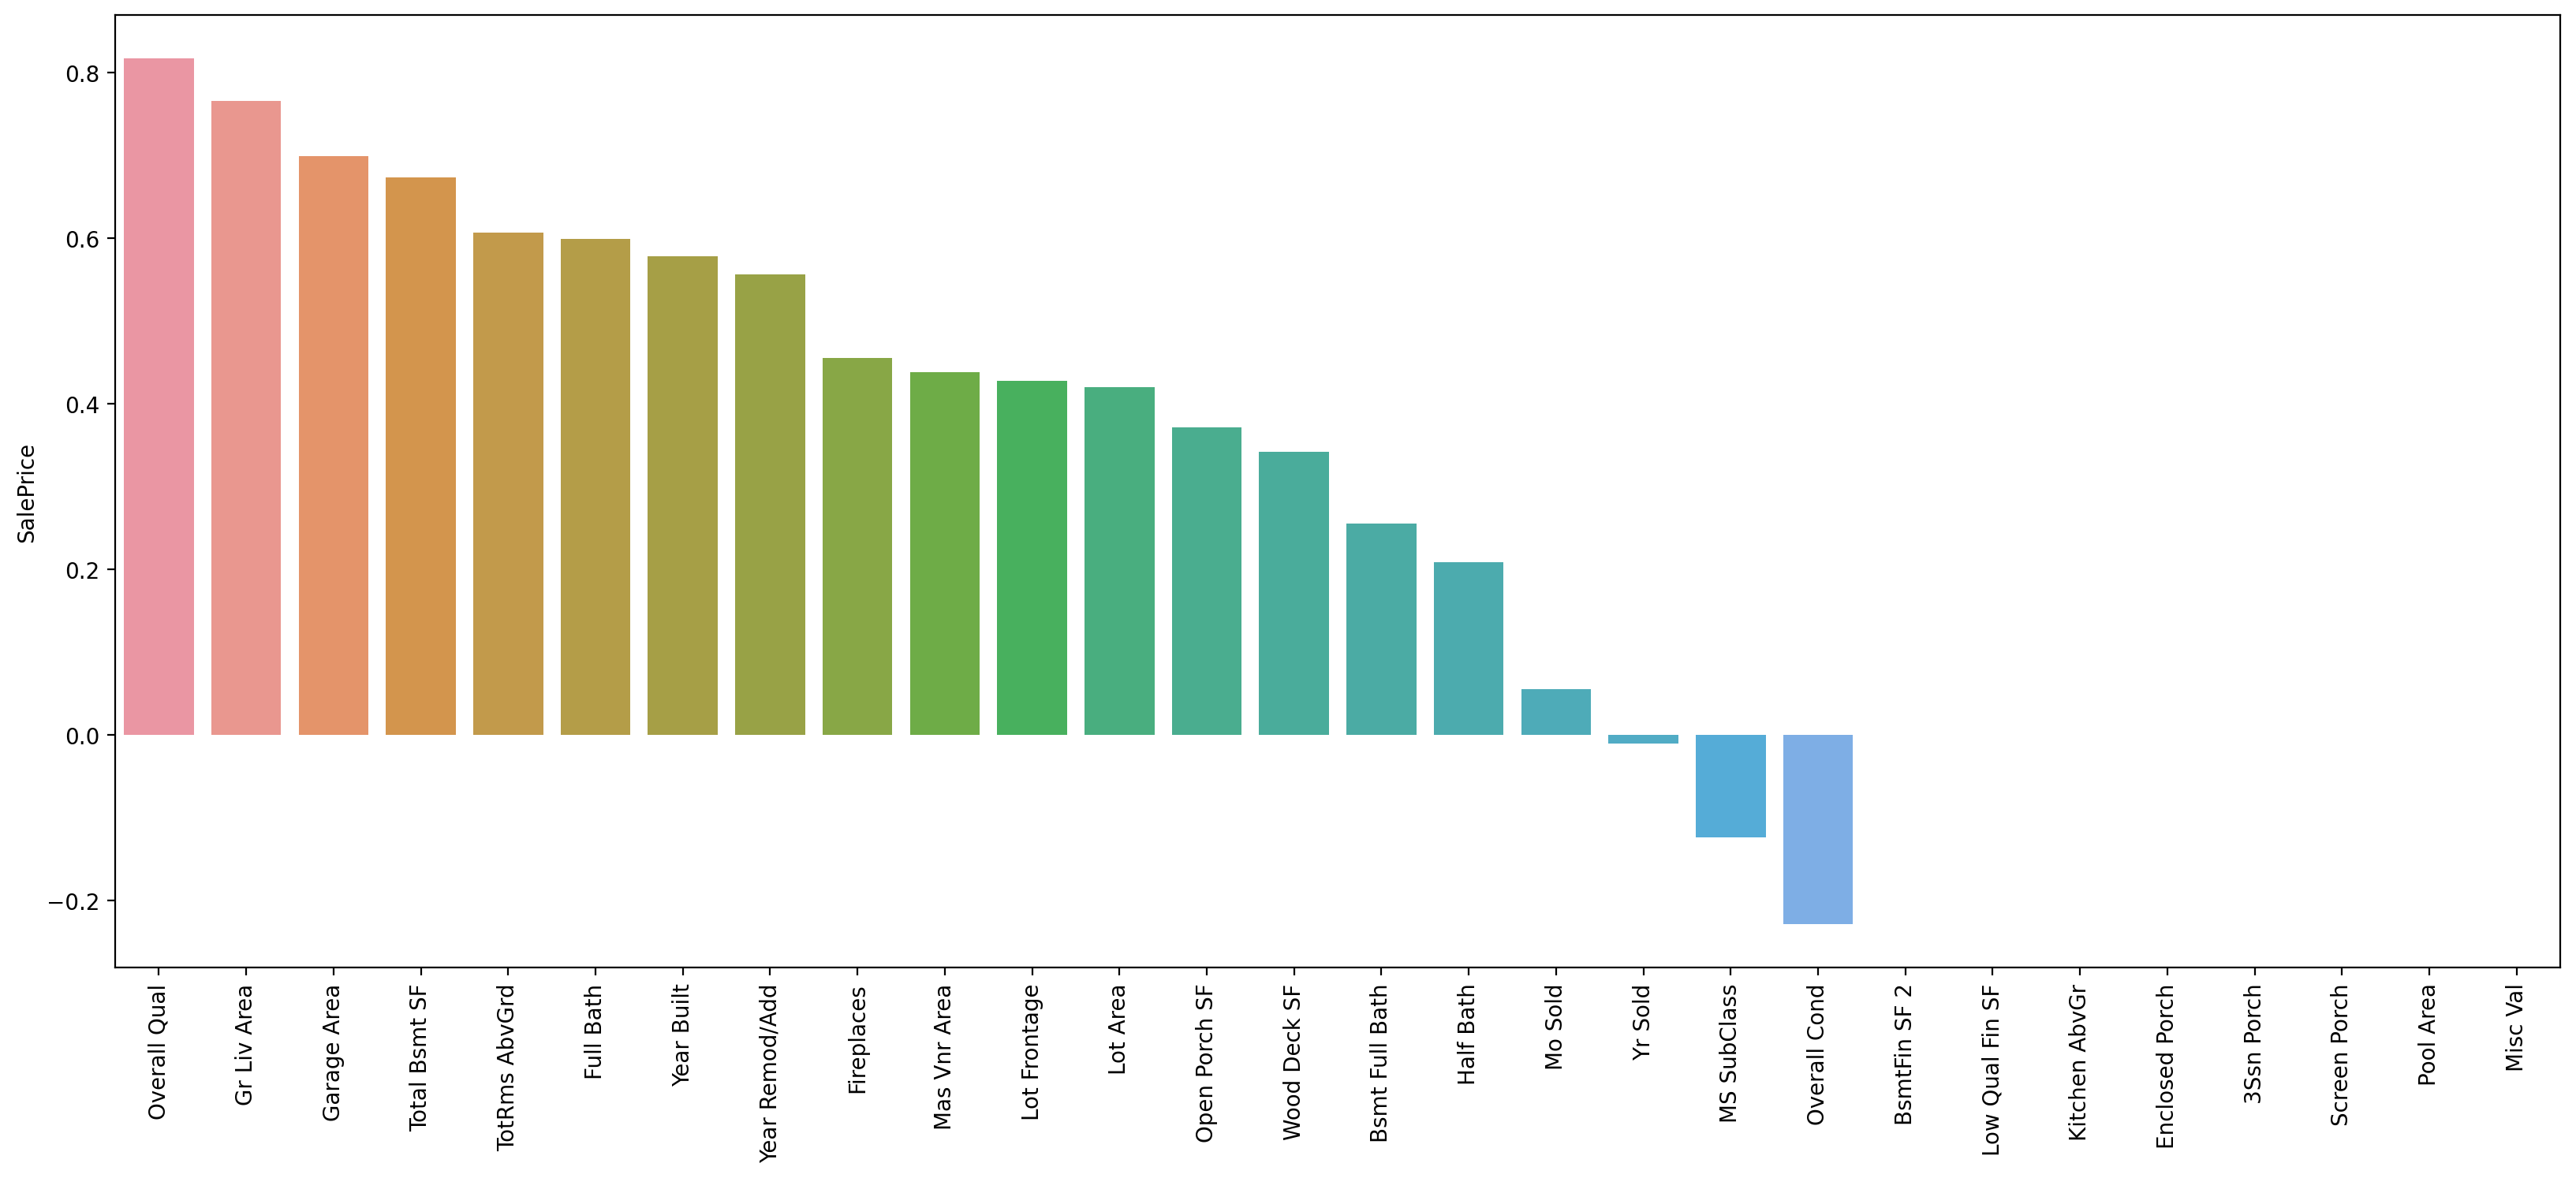

In [60]:
plt.figure(figsize=(20,8) , dpi = 200)

sns.barplot(x = df.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False).index , y = df.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False))

plt.xticks(rotation = 'vertical');

In [61]:
df.drop(['Mo Sold','BsmtFin SF 2' , 'Yr Sold'] , axis = 1 , inplace = True)

In [62]:
df.shape

(1598, 58)

# Creating X and y Features

In [63]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Sale Type,Sale Condition,SalePrice
3,20,RL,93.0,11160,Reg,Lvl,Corner,NAmes,Norm,Norm,...,0,0,0,0,0,0,0,WD,Normal,244000
4,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,Norm,...,212,34,0,0,0,0,0,WD,Normal,189900
5,60,RL,78.0,9978,IR1,Lvl,Inside,Gilbert,Norm,Norm,...,360,36,0,0,0,0,0,WD,Normal,195500
8,120,RL,39.0,5389,IR1,Lvl,Inside,StoneBr,Norm,Norm,...,237,152,0,0,0,0,0,WD,Normal,236500
9,60,RL,60.0,7500,Reg,Lvl,Inside,Gilbert,Norm,Norm,...,140,60,0,0,0,0,0,WD,Normal,189000


In [64]:
# X = df.drop('SalePrice' , axis = 1)
# X_ohe = pd.get_dummies(df.drop('SalePrice' , axis = 1) , drop_first = True)
# y = df['SalePrice']

In [65]:
# X = df_copy.drop('SalePrice' , axis = 1)
# y = df_copy['SalePrice']

## Feature Selection

In [66]:
# X = df[['Overall Qual' , 'Gr Liv Area' , 'Garage Area' , 'Total Bsmt SF' , 'Year Built' , 'Full Bath' , 'Mas Vnr Area' , 'Fireplaces' , 'Lot Area' , 'Bsmt Full Bath' , 'Lot Frontage' , 'Wood Deck SF' , 'Open Porch SF' ] ]
X_ohe = pd.get_dummies(df[['Overall Qual' , 'Gr Liv Area' , 'Garage Area' , 'Total Bsmt SF' , 'Year Built' , 'Full Bath' , 'Mas Vnr Area' , 'Overall Cond' ,
                           'Fireplaces' , 'Lot Area' , 'Bsmt Full Bath' , 'Lot Frontage' , 'Wood Deck SF' , 'Open Porch SF' , 'Garage Qual' ]] , drop_first=True)
# X_ohe = pd.get_dummies(df.drop('SalePrice' , axis = 1))
y = df['SalePrice']

In [67]:
from sklearn.preprocessing import PolynomialFeatures

poly_conv = PolynomialFeatures(degree = 2)

X_ohe_poly = poly_conv.fit_transform(X_ohe)
# X_poly = poly_conv.fit_transform(X)

## Encoding

In [68]:
# from sklearn.preprocessing import OrdinalEncoder

# enc = OrdinalEncoder()

# cat = X.select_dtypes('object').columns

# X[cat] = enc.fit_transform(X[cat])

## Train | Test Split

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe_poly, y, test_size = 0.2, random_state=53)

## Scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
# scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression().fit(X_train_scaled , y_train)

## Model Evaluation

In [73]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [74]:
def eval_metric(model, X_train, X_test, y_train , y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test Set")
    print(f"r2 score : {r2_score(y_test,y_pred)}")
    print(f"mae score : {mean_absolute_error(y_test,y_pred)}")
    print(f"rmse score : {mean_squared_error(y_test,y_pred)**0.5}\n\n")
    print("Train Set")
    print(f"r2 score : {r2_score(y_train,y_train_pred)}")
    print(f"mae score : {mean_absolute_error(y_train,y_train_pred)}")
    print(f"rmse score : {mean_squared_error(y_train,y_train_pred)**0.5}")

In [75]:
eval_metric(lr , X_train_scaled , X_test_scaled , y_train , y_test)

Test Set
r2 score : 0.9202413981430467
mae score : 14675.513679128784
rmse score : 20550.37881819518


Train Set
r2 score : 0.939882187911871
mae score : 12870.989728190654
rmse score : 18113.15756429235


In [76]:
lr.coef_

array([ 4.43379030e-06, -7.55616663e+05,  2.17024975e+06, -8.93147143e+05,
       -1.85791601e+06, -7.90428895e+05, -1.76668615e+06, -1.58157895e+06,
        1.01357992e+06,  2.81293503e+05, -2.17565884e+05, -3.09018985e+05,
       -8.37779863e+03, -1.05679838e+06, -6.93103173e+04,  2.53432444e+04,
        4.20920560e+03,  8.96704513e+05,  2.01116353e+05,  2.63793785e+05,
        3.07908327e+04,  3.33110620e+05,  6.09686567e+05, -2.10325974e+05,
       -9.37637870e+04,  3.56633056e+03,  6.44396565e+04,  4.31270631e+04,
        6.39953082e+04, -1.53535005e+05, -8.08688091e+04, -9.00176936e+03,
       -6.50481754e+04,  4.20920560e+03, -6.04060271e+04, -7.62762621e+04,
        2.01106289e+05,  3.86821258e+03, -2.24229142e+06,  1.82642523e+05,
        2.25295123e+04, -4.74613108e+04,  7.37331305e+02,  6.95441317e+04,
       -2.22246940e+04,  1.27065831e+04, -2.58535328e+04,  5.00387558e+03,
        4.00766885e+03,  3.22179231e+03, -3.93957456e+04,  5.63572880e+03,
       -4.00069185e+04,  

In [77]:
lr.coef_.shape

(171,)

# Lasso Model

In [78]:
from sklearn.linear_model import LassoCV

In [79]:
lasso = LassoCV(alphas = np.linspace(1,500,500) , cv = 5 , max_iter = 10000000).fit(X_train_scaled, y_train)

In [80]:
lasso.alpha_

17.0

## Model Evaluation

In [81]:
eval_metric(lasso , X_train_scaled , X_test_scaled , y_train , y_test)

Test Set
r2 score : 0.918914434228987
mae score : 14566.17425487786
rmse score : 20720.62454379425


Train Set
r2 score : 0.9298718889642104
mae score : 13829.446768282247
rmse score : 19563.144022424884


In [82]:
lasso.coef_

array([ 0.00000000e+00, -1.02881485e+05, -0.00000000e+00, -4.43681872e+04,
       -6.72484260e+04,  0.00000000e+00, -1.76307073e+04,  0.00000000e+00,
        6.14062485e+04, -0.00000000e+00,  0.00000000e+00, -1.09820108e+04,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.45775404e-01, -0.00000000e+00,  1.80471262e+04,  1.67927695e+05,
        5.51570579e+04,  2.34160581e+05, -0.00000000e+00, -0.00000000e+00,
        4.65281217e+03, -0.00000000e+00,  6.85729949e+04,  0.00000000e+00,
        5.67320670e+04, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -1.49323129e+03,  2.70761280e+03,
        7.99115667e+04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.02066916e+04,  1.14669171e+03,
       -0.00000000e+00,  0.00000000e+00, -1.22017677e+03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.07670813e+04,
        5.75598847e+03, -

In [83]:
lasso.coef_.shape

(171,)

# Ridge Model

In [84]:
from sklearn.linear_model import RidgeCV

In [85]:
ridge = RidgeCV(alphas = np.linspace(1,100,100) , cv = 5).fit(X_train_scaled , y_train)

In [86]:
ridge.alpha_

1.0

In [87]:
ridge.coef_

array([     0.        , -15747.78734632,   1669.08554945, -20979.65272633,
       -12756.91453065,  31222.33079857, -15890.81518626, -13063.86372282,
        23327.83614033,  -8001.35570508,   2658.66974843, -11302.05606596,
         4528.35536894,   7864.5559587 ,   1570.97326816,   2226.8563845 ,
        -1428.50044273,   2636.5072379 ,  54729.62563738,  60349.2263257 ,
        47551.60727897,  61200.63821503,  -9436.2150258 ,   6808.24212685,
        26137.26938537, -19743.48506065,  52833.91770238,  26364.11434892,
        44915.48191135,   2102.60824458,   6791.45370337,   5908.29598678,
        -3353.02129861,  -1428.50044273,  -9434.61925113,  31745.3887165 ,
        41989.64912284,  30927.67521783,   6043.37005644,  29853.27949519,
         5017.77922902,   8603.46905404,  23173.8490934 ,  16600.0166666 ,
         4374.72036248,  15042.64073508, -12998.7519254 ,  11537.93778122,
        -5872.76983894,  -1555.80685818,   3000.18290588,  20016.80998016,
        30955.37916179, -

## Model Evaluation

In [88]:
eval_metric(ridge, X_train_scaled , X_test_scaled , y_train , y_test)

Test Set
r2 score : 0.9180170058867426
mae score : 14502.961468206631
rmse score : 20834.973544947232


Train Set
r2 score : 0.9285006645258234
mae score : 13914.03046402373
rmse score : 19753.478517848067


In [89]:
ridge.coef_

array([     0.        , -15747.78734632,   1669.08554945, -20979.65272633,
       -12756.91453065,  31222.33079857, -15890.81518626, -13063.86372282,
        23327.83614033,  -8001.35570508,   2658.66974843, -11302.05606596,
         4528.35536894,   7864.5559587 ,   1570.97326816,   2226.8563845 ,
        -1428.50044273,   2636.5072379 ,  54729.62563738,  60349.2263257 ,
        47551.60727897,  61200.63821503,  -9436.2150258 ,   6808.24212685,
        26137.26938537, -19743.48506065,  52833.91770238,  26364.11434892,
        44915.48191135,   2102.60824458,   6791.45370337,   5908.29598678,
        -3353.02129861,  -1428.50044273,  -9434.61925113,  31745.3887165 ,
        41989.64912284,  30927.67521783,   6043.37005644,  29853.27949519,
         5017.77922902,   8603.46905404,  23173.8490934 ,  16600.0166666 ,
         4374.72036248,  15042.64073508, -12998.7519254 ,  11537.93778122,
        -5872.76983894,  -1555.80685818,   3000.18290588,  20016.80998016,
        30955.37916179, -

In [90]:
ridge.coef_.shape

(171,)

# ElasticNet Model

In [91]:
from sklearn.linear_model import ElasticNetCV


els = ElasticNetCV(l1_ratio=np.linspace(0.01,1,10) , alphas=np.linspace(0.01,100,100) , max_iter = 100000000 , cv = 5 ).fit(X_train_scaled , y_train)

In [92]:
els.l1_ratio_

1.0

In [93]:
els.alpha_

10.0

In [94]:
els.coef_

array([ 0.00000000e+00, -1.36323639e+05, -5.36860442e+02, -5.50783495e+04,
       -9.06246029e+04,  0.00000000e+00, -8.67103651e+03,  0.00000000e+00,
        5.99274601e+04, -4.08325960e+03,  0.00000000e+00, -2.60515075e+04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.26525559e+01,  5.98345620e+04,  1.52996750e+05,
        6.10691229e+04,  2.68296257e+05, -0.00000000e+00, -4.64401312e+04,
        0.00000000e+00, -0.00000000e+00,  7.91245972e+04,  0.00000000e+00,
        5.31726891e+04, -0.00000000e+00, -1.84365652e+03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        9.87403941e+04,  0.00000000e+00, -0.00000000e+00,  1.38786329e+04,
       -0.00000000e+00,  0.00000000e+00,  2.29395954e+04,  1.13015425e+04,
       -4.69408660e+02,  0.00000000e+00, -2.32809937e+04,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -6.45780351e+03,  1.55957335e+04,
        0.00000000e+00, -

In [95]:
els.coef_.shape

(171,)

## Model Evaluation

In [96]:
eval_metric(els, X_train_scaled , X_test_scaled , y_train , y_test)

Test Set
r2 score : 0.9193333266720267
mae score : 14637.807482225824
rmse score : 20667.033303659762


Train Set
r2 score : 0.9322421195487118
mae score : 13637.778909424638
rmse score : 19229.699067065812


In [97]:
# Done